<a href="https://colab.research.google.com/github/Clemilton2607/Reconstrucao_de_Imagem/blob/main/Convolucional_Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import plotly.express as px
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, Input, UpSampling2D,Reshape
from tensorflow.keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.models import Model, Sequential
from tensorflow.keras.utils import load_img, img_to_array
from sklearn.model_selection import train_test_split
from skimage.metrics import mean_squared_error

# Definir a semente (random state)
np.random.seed(42)
tf.random.set_seed(42)

#bla bla

In [ ]:
import tensorflow as tf

# Carregar a arquitetura do modelo a partir do arquivo JSON
with open('/content/drive/MyDrive/Redes Neurais Salvas/autoencoder_01.json', 'r') as json_file:
    autoencoder_json = json_file.read()

autoencoder = tf.keras.models.model_from_json(autoencoder_json)

# Carregar os pesos do modelo a partir do arquivo HDF5
autoencoder.load_weights('/content/drive/MyDrive/Redes Neurais Salvas/autoencoder.h5')


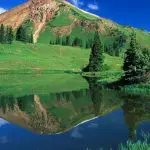

In [ ]:
# Carregando a imagem
image_teste3 = tf.keras.preprocessing.image.load_img(
    '/content/imagem_teste.png',
    grayscale=False,
    target_size=(150,150),
)
img = image_teste3
img

# Autoencoder Convolucional


## Carregando lista com Imagens RGB

In [ ]:
# Carregar a lista concatenada do arquivo usando o pickle
with open('/content/drive/MyDrive/RGB/lista_200.pkl', 'rb') as arquivo:
  rgb = pickle.load(arquivo)

print(rgb)

df2 = np.array(rgb)

[array([[[0.32941177, 0.39215687, 0.        ],
        [0.28235295, 0.34509805, 0.        ],
        [0.37254903, 0.43137255, 0.        ],
        ...,
        [0.31764707, 0.28627452, 0.        ],
        [0.31764707, 0.28627452, 0.        ],
        [0.32156864, 0.2901961 , 0.        ]],

       [[0.76862746, 0.8352941 , 0.        ],
        [0.7058824 , 0.7647059 , 0.        ],
        [0.6784314 , 0.7372549 , 0.        ],
        ...,
        [0.29411766, 0.2627451 , 0.        ],
        [0.28627452, 0.25490198, 0.        ],
        [0.29803923, 0.26666668, 0.        ]],

       [[0.34509805, 0.4117647 , 0.        ],
        [0.7137255 , 0.78039217, 0.        ],
        [0.7764706 , 0.84313726, 0.        ],
        ...,
        [0.28235295, 0.2509804 , 0.        ],
        [0.31764707, 0.28627452, 0.        ],
        [0.32941177, 0.29803923, 0.        ]],

       ...,

       [[0.14509805, 0.13725491, 0.        ],
        [0.16862746, 0.16078432, 0.        ],
        [0.13725491, 

## Teste x treinamento

In [ ]:
x_train, x_test = train_test_split(df2, test_size = 0.20, random_state = 42)
x_train.shape

(560, 150, 150, 3)

In [ ]:
x_test.shape

(140, 150, 150, 3)

## Rede Neural

In [ ]:
# AUTOENCODER
autoencoder = Sequential()
# Encoder
autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', input_shape=(150,150,3)))
autoencoder.add(MaxPooling2D(pool_size = (2,2)))


autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size = (2,2), padding='same'))

autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding='same', strides = (2,2)))

autoencoder.add(Flatten())

autoencoder.add(Reshape((19,19,32)))

# Decoder
autoencoder.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))

autoencoder.add(Conv2D(filters =32, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size =(2,2)))

autoencoder.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu', padding='same'))
autoencoder.add(UpSampling2D(size = (2,2)))


autoencoder.add(Conv2D(filters = 3, kernel_size = (3,3), activation = 'sigmoid'))


autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error',
                    metrics = ['accuracy'])

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 19, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 11552)             0

In [ ]:
history6 = autoencoder.fit(x_train, x_train,
                epochs=500, batch_size=128, validation_data=(x_test, x_test))

Epoch 1/500
5/5 [==============================] - 23s 988ms/step - loss: 0.1526 - accuracy: 0.4307 - val_loss: 0.1161 - val_accuracy: 0.5969
Epoch 2/500
5/5 [==============================] - 2s 359ms/step - loss: 0.1143 - accuracy: 0.5217 - val_loss: 0.1067 - val_accuracy: 0.4081
Epoch 3/500
5/5 [==============================] - 1s 272ms/step - loss: 0.1000 - accuracy: 0.4689 - val_loss: 0.0808 - val_accuracy: 0.6708
Epoch 4/500
5/5 [==============================] - 1s 258ms/step - loss: 0.0752 - accuracy: 0.6695 - val_loss: 0.0557 - val_accuracy: 0.7787
Epoch 5/500
5/5 [==============================] - 1s 230ms/step - loss: 0.0504 - accuracy: 0.8237 - val_loss: 0.0368 - val_accuracy: 0.8651
Epoch 6/500
5/5 [==============================] - 1s 245ms/step - loss: 0.0326 - accuracy: 0.8658 - val_loss: 0.0260 - val_accuracy: 0.8442
Epoch 7/500
5/5 [==============================] - 1s 232ms/step - loss: 0.0239 - accuracy: 0.8287 - val_loss: 0.0191 - val_accuracy: 0.8766
Epoch 8/500


In [ ]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)

In [ ]:
# Prevendo Imagens
imagens_codificadas = encoder.predict(x_test)
imagens_decodificadas = autoencoder.predict(x_test)

5/5 [==============================] - 1s 15ms/step


5/5 [==============================] - 0s 25ms/step


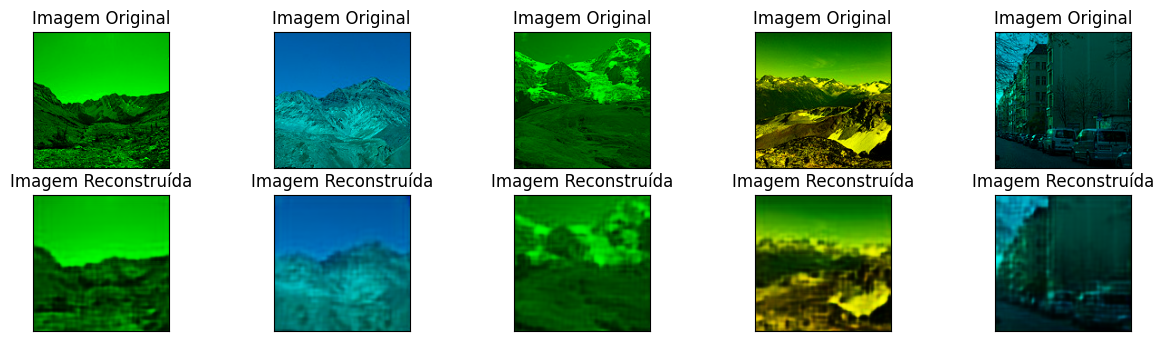

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Plotando imagens de entrada, reconstruída e nítida
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)

# Imagens de entrada
plt.figure(figsize=(15, 6))
for i, indice_imagem in enumerate(imagens_teste):
    plt.subplot(3, numero_imagens, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(150, 150,3))
    plt.xticks(())
    plt.yticks(())
    plt.title('Imagem Original')

# Imagens reconstruídas
reconstructed_imgs = autoencoder.predict(x_test)
for i, indice_imagem in enumerate(imagens_teste):
    plt.subplot(3, numero_imagens, numero_imagens + i + 1)
    plt.imshow(reconstructed_imgs[indice_imagem].reshape(150, 150,3))
    plt.xticks(())
    plt.yticks(())
    plt.title('Imagem Reconstruída')

In [ ]:
from keras.layers import Conv2DTranspose

# Construir o modelo da rede neural convolucional para melhorar a nitidez
input_img = Input(shape=(150, 150, 3))
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

model = Model(input_img, decoded)
model.compile(optimizer='adam', loss='mean_squared_error', metrics = ['accuracy'])

# Treinar o modelo
model.fit(imagens_decodificadas, x_test, epochs=500, batch_size=64, shuffle=True)

# Melhorar a nitidez das imagens de teste
enhanced_imgs = model.predict(imagens_decodificadas)

Epoch 1/500
3/3 [==============================] - 10s 982ms/step - loss: 0.1577 - accuracy: 0.6133
Epoch 2/500
3/3 [==============================] - 0s 130ms/step - loss: 0.1348 - accuracy: 0.8493
Epoch 3/500
3/3 [==============================] - 0s 132ms/step - loss: 0.1041 - accuracy: 0.8530
Epoch 4/500
3/3 [==============================] - 0s 128ms/step - loss: 0.0894 - accuracy: 0.8037
Epoch 5/500
3/3 [==============================] - 0s 128ms/step - loss: 0.0713 - accuracy: 0.7945
Epoch 6/500
3/3 [==============================] - 0s 128ms/step - loss: 0.0602 - accuracy: 0.8551
Epoch 7/500
3/3 [==============================] - 0s 130ms/step - loss: 0.0553 - accuracy: 0.9190
Epoch 8/500
3/3 [==============================] - 0s 134ms/step - loss: 0.0464 - accuracy: 0.9040
Epoch 9/500
3/3 [==============================] - 0s 143ms/step - loss: 0.0394 - accuracy: 0.9113
Epoch 10/500
3/3 [==============================] - 0s 140ms/step - loss: 0.0308 - accuracy: 0.8995
Epoch 11

## Resultados

5/5 [==============================] - 0s 40ms/step


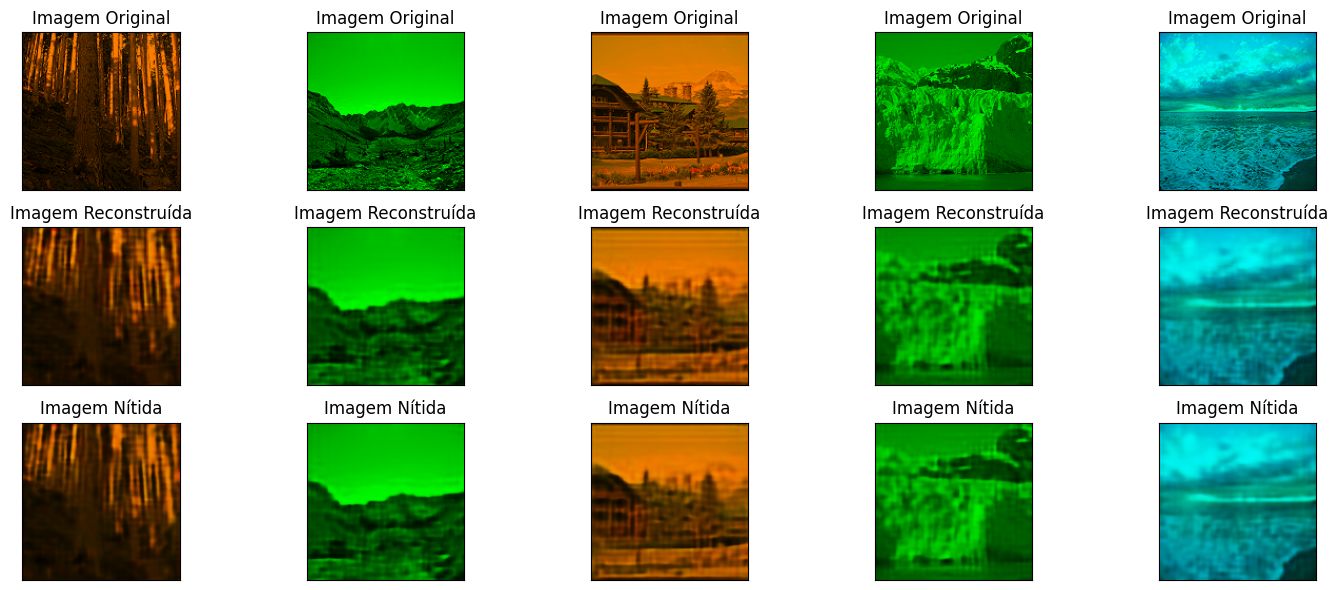

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model

# Plotando imagens de entrada, reconstruída e nítida
numero_imagens = 5
imagens_teste = np.random.randint(x_test.shape[0], size=numero_imagens)

# Imagens de entrada
plt.figure(figsize=(15, 6))
for i, indice_imagem in enumerate(imagens_teste):
    plt.subplot(3, numero_imagens, i + 1)
    plt.imshow(x_test[indice_imagem].reshape(150, 150,3))
    plt.xticks(())
    plt.yticks(())
    plt.title('Imagem Original')

# Imagens reconstruídas
reconstructed_imgs = autoencoder.predict(x_test)
for i, indice_imagem in enumerate(imagens_teste):
    plt.subplot(3, numero_imagens, numero_imagens + i + 1)
    plt.imshow(reconstructed_imgs[indice_imagem].reshape(150, 150,3))
    plt.xticks(())
    plt.yticks(())
    plt.title('Imagem Reconstruída')

# Imagens nítidas
enhanced_imgs = model.predict(reconstructed_imgs)
for i, indice_imagem in enumerate(imagens_teste):
    plt.subplot(3, numero_imagens, 2 * numero_imagens + i + 1)
    plt.imshow(enhanced_imgs[indice_imagem].reshape(150, 150,3))
    plt.xticks(())
    plt.yticks(())
    plt.title('Imagem Nítida')

plt.tight_layout()
plt.show()


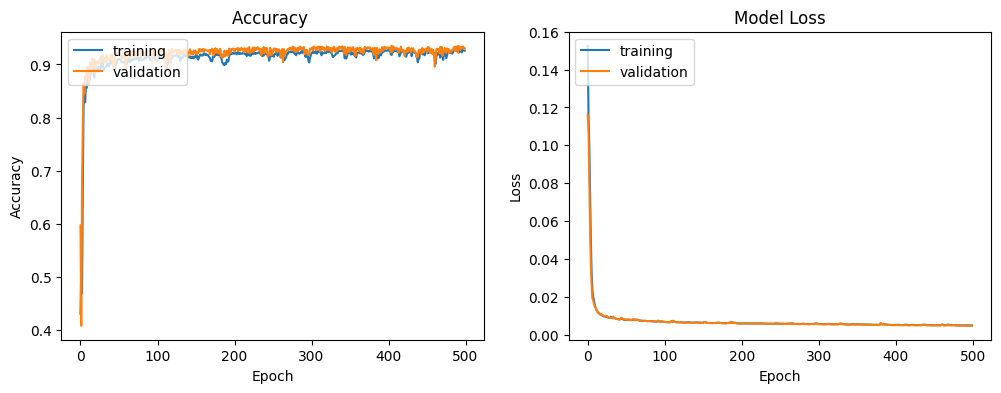

In [ ]:
# Plotando curvas de Acuracia e Loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('Accuracy ')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')

plt.show()

#Vendo o gráfico, da para ver que ele converge a partir de 40 epocas, ou seja, nao é necessário realizar mais treinamentos

In [ ]:
# Métricas de avaliação do modelo criado
mse = []
m1 = mean_squared_error(x_test, imagens_decodificadas)
rmse = np.sqrt(m1)
print(f"MSE =  {m1}")
print(f"RMSE =  {rmse}")

MSE =  0.004692816064416924
RMSE =  0.06850413173245044


## Salvando o Modelo Autoencoder Convolucional

In [ ]:
autoencoder_json = autoencoder.to_json()
with open('autoencoder_final.json', 'w') as json_file:
    json_file.write(autoencoder_json)
autoencoder.save_weights('autoencoder_pesos.h5')

In [ ]:
model_json = model.to_json()
with open('model_final.json', 'w') as json_file:
    json_file.write(model_json)
model.save_weights('model_peso_final.h5')

## Fazendo Teste Unitário (AZUL)

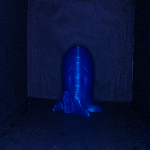

In [ ]:
# Carregando a imagem
image_teste1 = tf.keras.preprocessing.image.load_img(
    '/content/pibic.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste2 = tf.keras.preprocessing.image.load_img(
    '/content/pibic0.jpg',
    grayscale=False,
    target_size=(150,150),
)
img1 = image_teste1
img2 = image_teste2
img1

In [ ]:
# Normalização da imagem
image_teste1 = tf.keras.utils.img_to_array(
    image_teste1, data_format=None, dtype=None
)
image_teste1/= 255
image_teste1.astype('float32')
image_teste1 = np.expand_dims(image_teste1, axis = 0)

# Normalização da imagem
image_teste2 = tf.keras.utils.img_to_array(
    image_teste2, data_format=None, dtype=None
)
image_teste2/= 255
image_teste2.astype('float32')
image_teste2 = np.expand_dims(image_teste2, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas1 = encoder.predict(image_teste1)
imagens_decodificadas1 = autoencoder.predict(image_teste1)
imagens_nitida1 = model.predict(image_teste1)

# Predição da imagem
imagens_codificadas2 = encoder.predict(image_teste2)
imagens_decodificadas2 = autoencoder.predict(image_teste2)
imagens_nitida2 = model.predict(image_teste2)

1/1 [==============================] - 0s 21ms/step


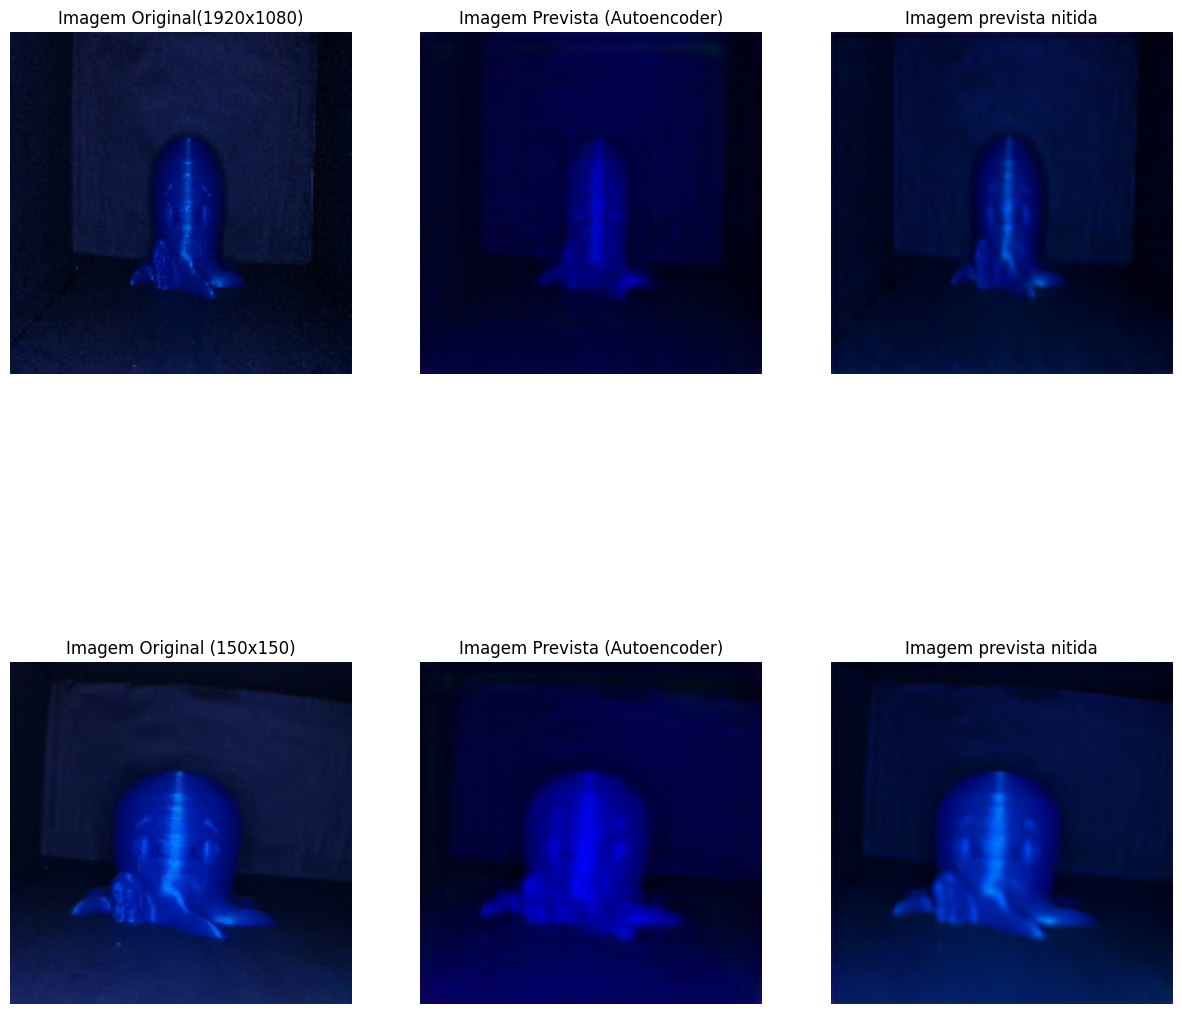

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img1)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas1[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida1[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img2)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas2[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida2[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Vermelho)

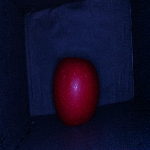

In [ ]:
# Carregando a imagem
image_teste3 = tf.keras.preprocessing.image.load_img(
    '/content/pibic2.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste4 = tf.keras.preprocessing.image.load_img(
    '/content/pibic1.jpg',
    grayscale=False,
    target_size=(150,150),
)
img3 = image_teste3
img4 = image_teste4
img3

In [ ]:
# Normalização da imagem
image_teste3 = tf.keras.utils.img_to_array(
    image_teste3, data_format=None, dtype=None
)
image_teste3/= 255
image_teste3.astype('float32')
image_teste3 = np.expand_dims(image_teste3, axis = 0)

# Normalização da imagem
image_teste4 = tf.keras.utils.img_to_array(
    image_teste4, data_format=None, dtype=None
)
image_teste4/= 255
image_teste4.astype('float32')
image_teste4 = np.expand_dims(image_teste4, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas3 = encoder.predict(image_teste3)
imagens_decodificadas3 = autoencoder.predict(image_teste3)
imagens_nitida3 = model.predict(image_teste3)

# Predição da imagem
imagens_codificadas4 = encoder.predict(image_teste4)
imagens_decodificadas4 = autoencoder.predict(image_teste4)
imagens_nitida4 = model.predict(image_teste4)

1/1 [==============================] - 0s 26ms/step


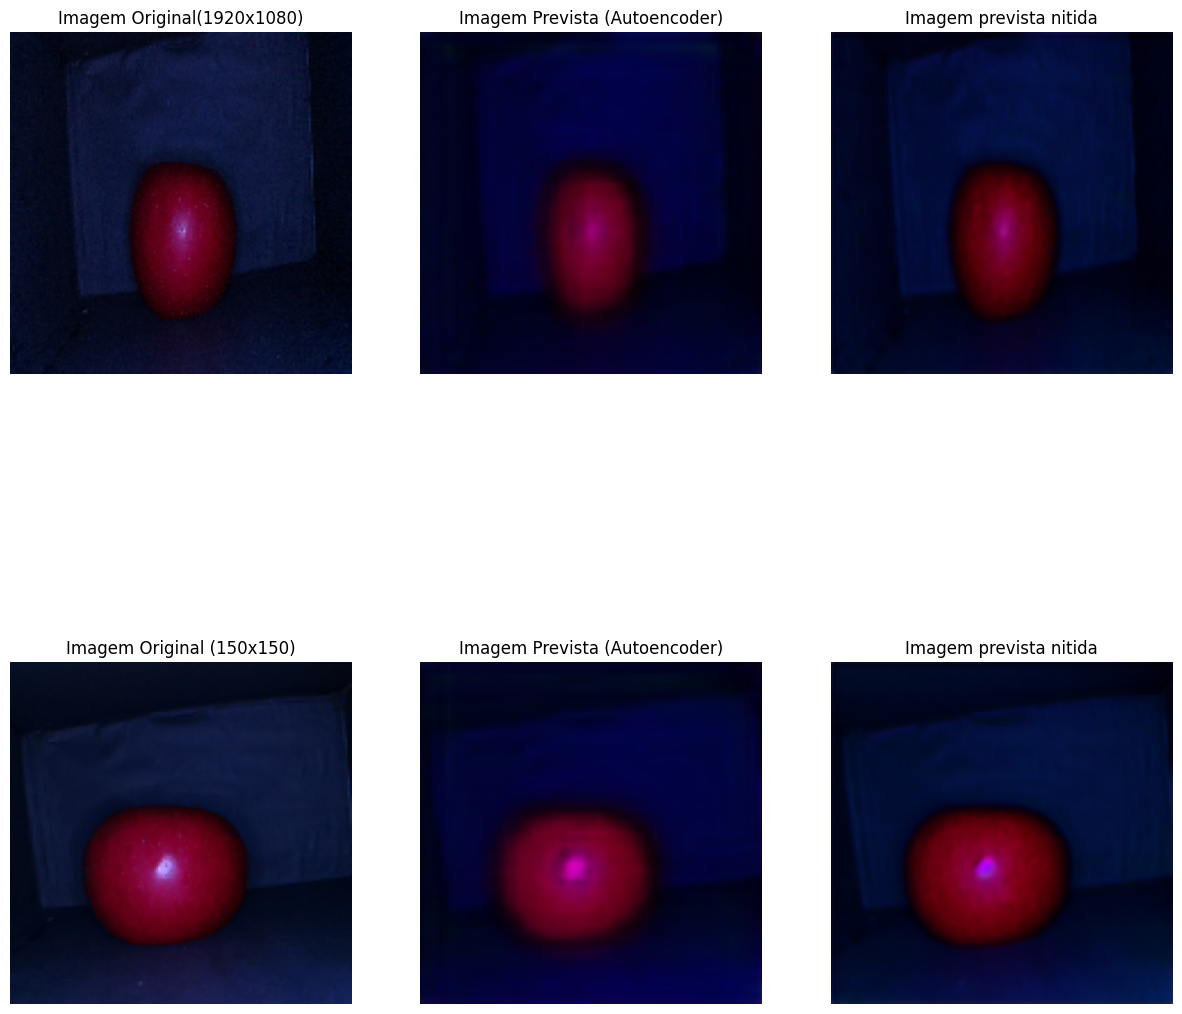

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img3)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas3[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida3[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img4)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas4[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida4[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Amarelo)

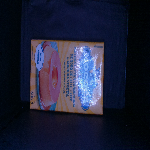

In [ ]:
# Carregando a imagem
image_teste5 = tf.keras.preprocessing.image.load_img(
    '/content/pibic3.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste6 = tf.keras.preprocessing.image.load_img(
    '/content/pibic4.jpg',
    grayscale=False,
    target_size=(150,150),
)
img5 = image_teste5
img6 = image_teste6
img5

In [ ]:
# Normalização da imagem
image_teste5 = tf.keras.utils.img_to_array(
    image_teste5, data_format=None, dtype=None
)
image_teste5/= 255
image_teste5.astype('float32')
image_teste5 = np.expand_dims(image_teste5, axis = 0)

# Normalização da imagem
image_teste6 = tf.keras.utils.img_to_array(
    image_teste6, data_format=None, dtype=None
)
image_teste6/= 255
image_teste6.astype('float32')
image_teste6 = np.expand_dims(image_teste6, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas5 = encoder.predict(image_teste5)
imagens_decodificadas5 = autoencoder.predict(image_teste5)
imagens_nitida5 = model.predict(image_teste5)

# Predição da imagem
imagens_codificadas6 = encoder.predict(image_teste6)
imagens_decodificadas6 = autoencoder.predict(image_teste6)
imagens_nitida6 = model.predict(image_teste6)

1/1 [==============================] - 0s 66ms/step


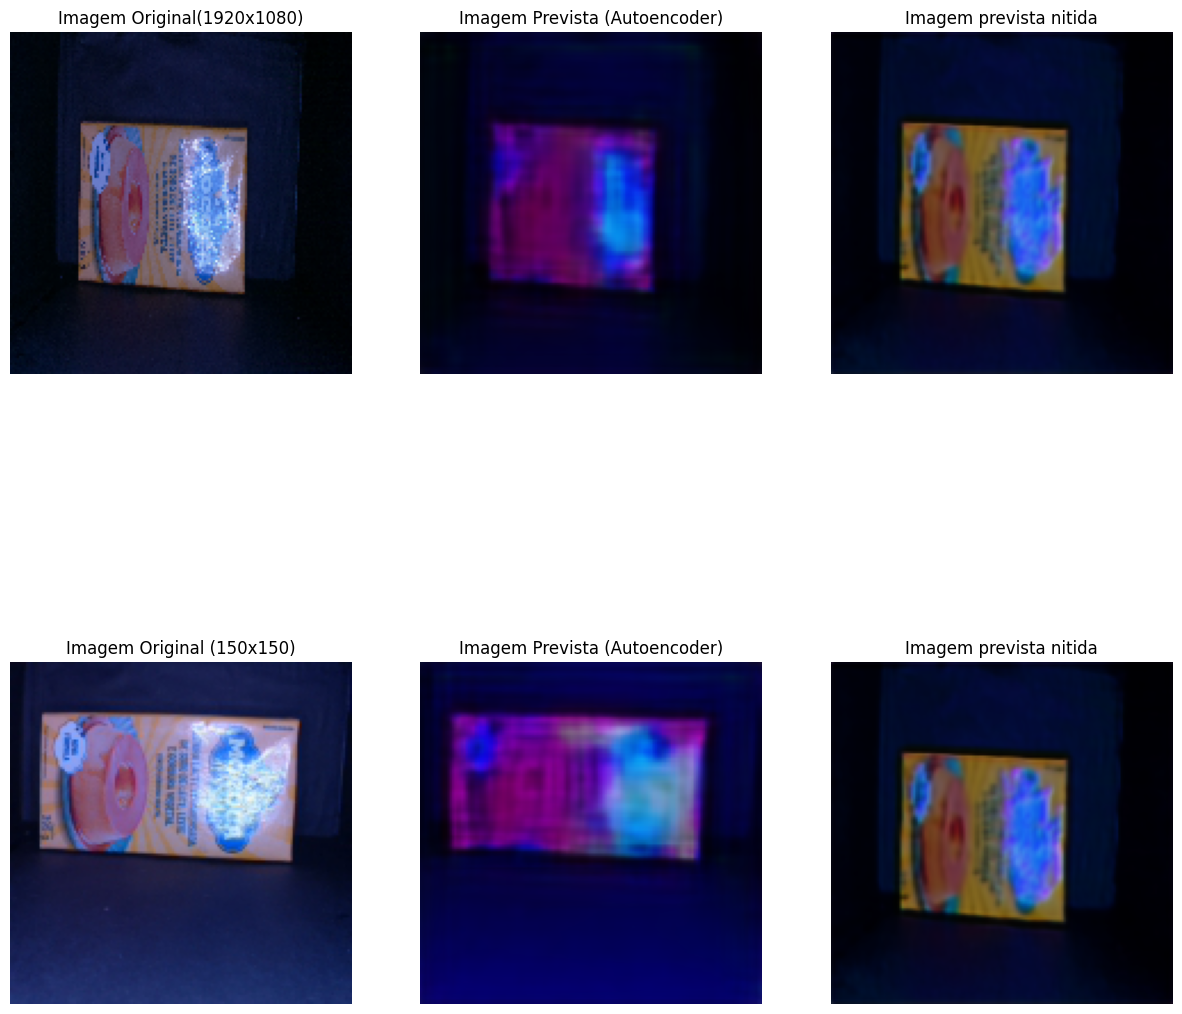

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img5)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas5[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida5[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img6)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas6[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida5[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Verde)

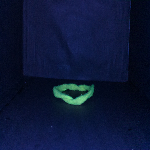

In [ ]:
# Carregando a imagem
image_teste7 = tf.keras.preprocessing.image.load_img(
    '/content/pibic5.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste8 = tf.keras.preprocessing.image.load_img(
    '/content/pibic6.jpg',
    grayscale=False,
    target_size=(150,150),
)
img7 = image_teste7
img8 = image_teste8
img7

In [ ]:
# Normalização da imagem
image_teste7 = tf.keras.utils.img_to_array(
    image_teste7, data_format=None, dtype=None
)
image_teste7/= 255
image_teste7.astype('float32')
image_teste7 = np.expand_dims(image_teste7, axis = 0)

# Normalização da imagem
image_teste8 = tf.keras.utils.img_to_array(
    image_teste8, data_format=None, dtype=None
)
image_teste8/= 255
image_teste8.astype('float32')
image_teste8 = np.expand_dims(image_teste8, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas7 = encoder.predict(image_teste7)
imagens_decodificadas7 = autoencoder.predict(image_teste7)
imagens_nitida7 = model.predict(image_teste7)

# Predição da imagem
imagens_codificadas8 = encoder.predict(image_teste8)
imagens_decodificadas8 = autoencoder.predict(image_teste8)
imagens_nitida8 = model.predict(image_teste8)

1/1 [==============================] - 0s 26ms/step


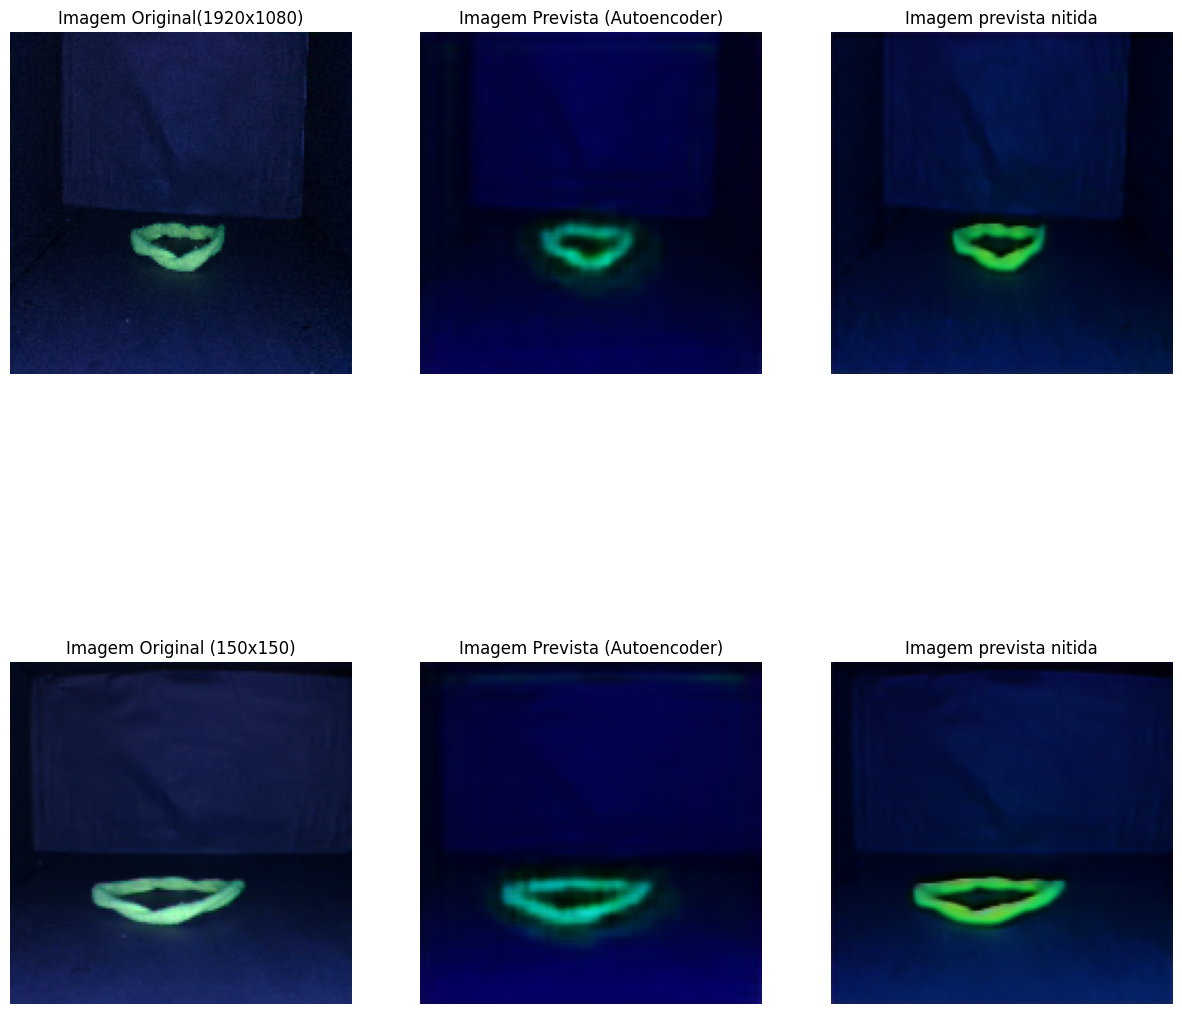

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img7)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas7[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida7[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img8)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas8[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida8[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Lata de milho)

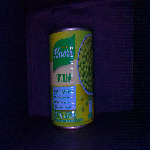

In [ ]:
# Carregando a imagem
image_teste9 = tf.keras.preprocessing.image.load_img(
    '/content/pibic8.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste10 = tf.keras.preprocessing.image.load_img(
    '/content/pibic7.jpg',
    grayscale=False,
    target_size=(150,150),
)
img9 = image_teste9
img10 = image_teste10
img9

In [ ]:
# Normalização da imagem
image_teste9 = tf.keras.utils.img_to_array(
    image_teste9, data_format=None, dtype=None
)
image_teste9/= 255
image_teste9.astype('float32')
image_teste9 = np.expand_dims(image_teste9, axis = 0)

# Normalização da imagem
image_teste10 = tf.keras.utils.img_to_array(
    image_teste10, data_format=None, dtype=None
)
image_teste10/= 255
image_teste10.astype('float32')
image_teste10 = np.expand_dims(image_teste10, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas9 = encoder.predict(image_teste9)
imagens_decodificadas9 = autoencoder.predict(image_teste9)
imagens_nitida9 = model.predict(image_teste9)

# Predição da imagem
imagens_codificadas10 = encoder.predict(image_teste10)
imagens_decodificadas10 = autoencoder.predict(image_teste10)
imagens_nitida10 = model.predict(image_teste10)

1/1 [==============================] - 0s 24ms/step


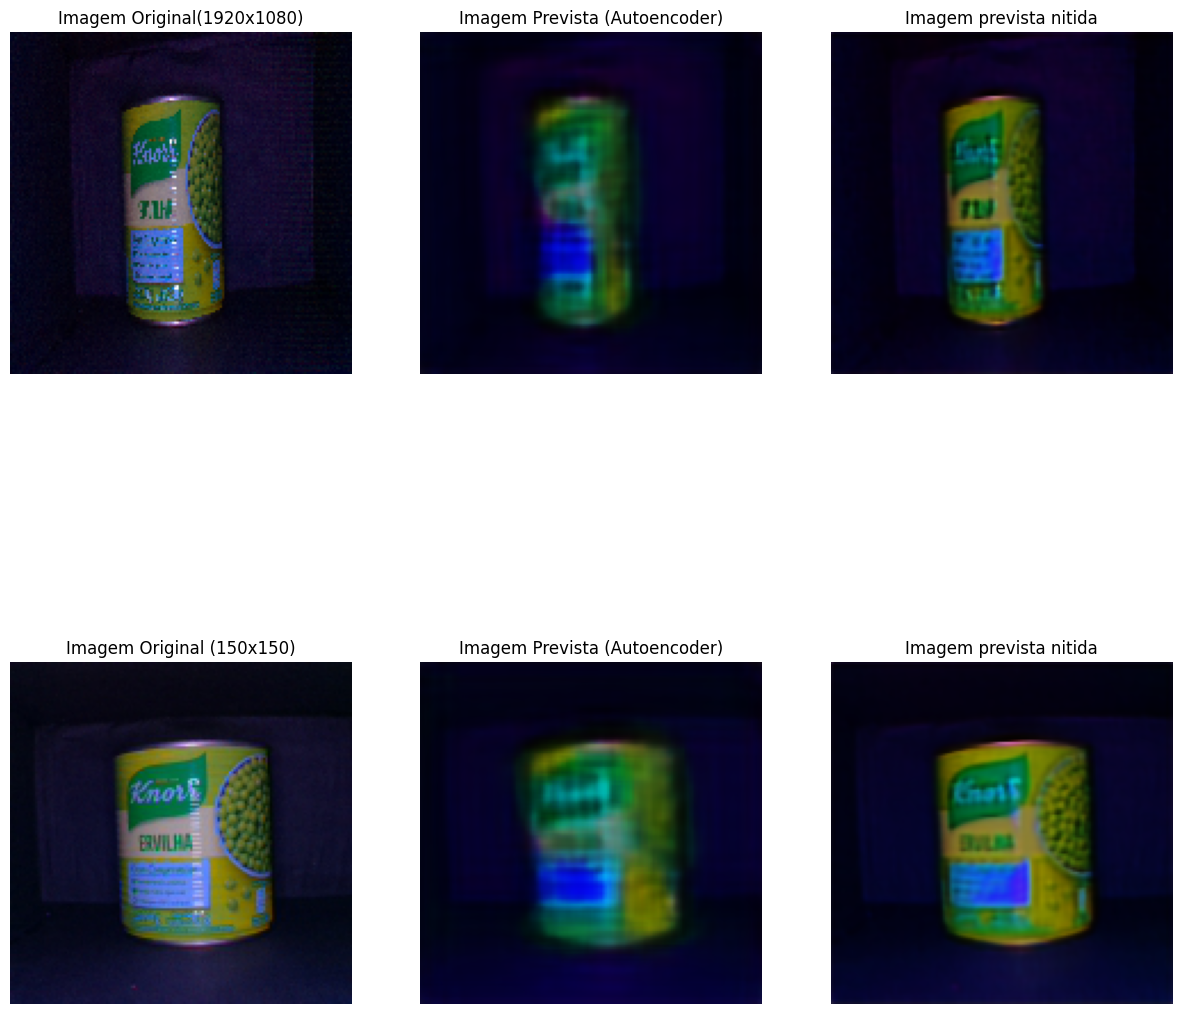

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img9)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas9[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida9[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img10)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas10[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida10[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Pikachu)

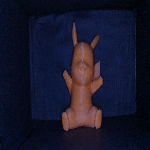

In [ ]:
# Carregando a imagem
image_teste11 = tf.keras.preprocessing.image.load_img(
    '/content/pibic9.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste12 = tf.keras.preprocessing.image.load_img(
    '/content/pibic10.jpg',
    grayscale=False,
    target_size=(150,150),
)
img11 = image_teste11
img12 = image_teste12
img11

In [ ]:
# Normalização da imagem
image_teste11 = tf.keras.utils.img_to_array(
    image_teste11, data_format=None, dtype=None
)
image_teste11/= 255
image_teste11.astype('float32')
image_teste11 = np.expand_dims(image_teste11, axis = 0)

# Normalização da imagem
image_teste12 = tf.keras.utils.img_to_array(
    image_teste12, data_format=None, dtype=None
)
image_teste12/= 255
image_teste12.astype('float32')
image_teste12 = np.expand_dims(image_teste12, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas11 = encoder.predict(image_teste11)
imagens_decodificadas11 = autoencoder.predict(image_teste11)
imagens_nitida11 = model.predict(image_teste11)

# Predição da imagem
imagens_codificadas12 = encoder.predict(image_teste12)
imagens_decodificadas12 = autoencoder.predict(image_teste12)
imagens_nitida12 = model.predict(image_teste12)

1/1 [==============================] - 0s 18ms/step


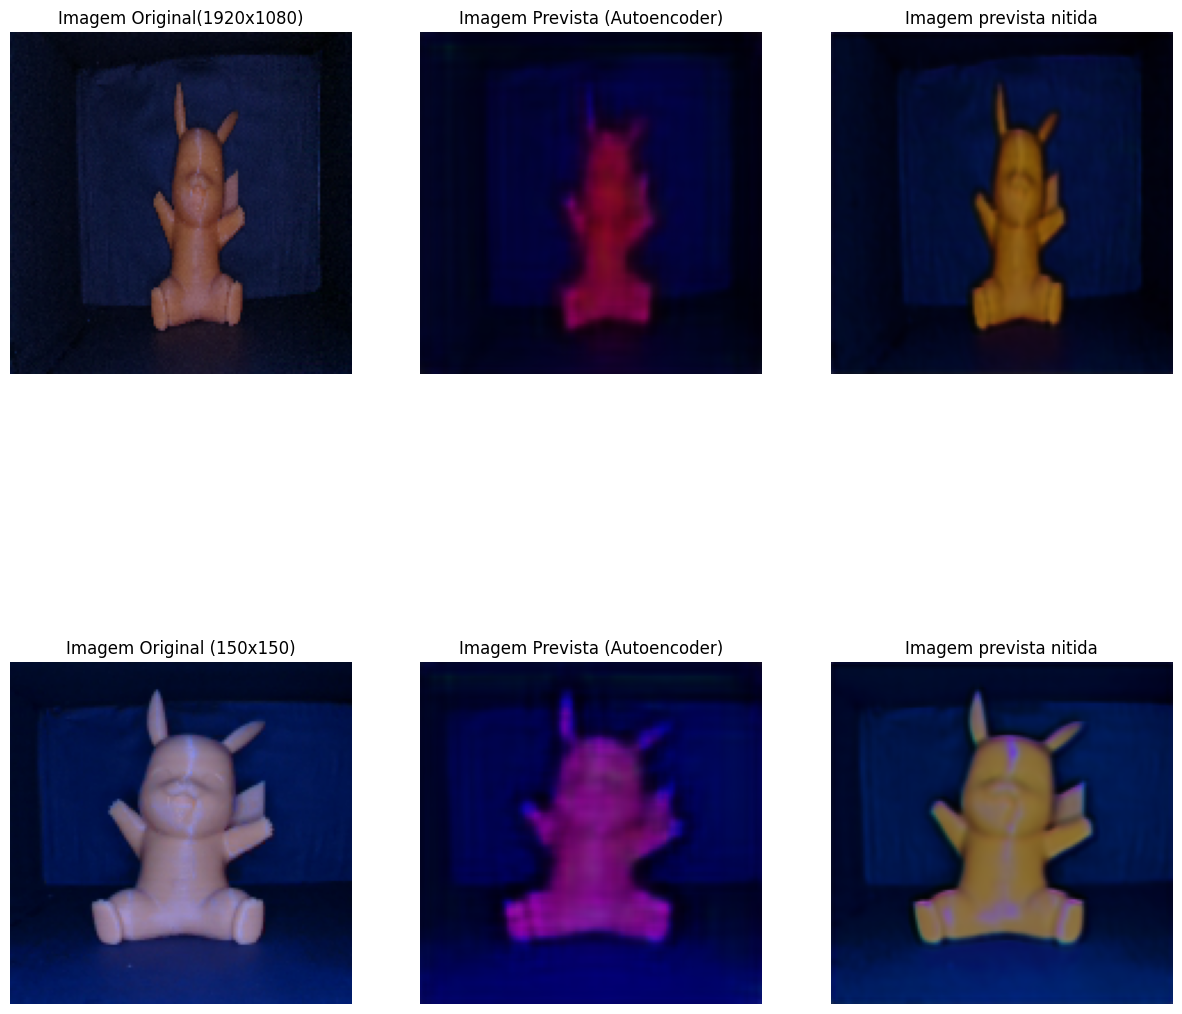

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img11)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas11[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida11[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img12)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas12[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida12[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()


## Teste Unitario (Chamander)

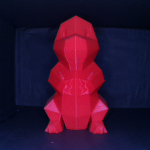

In [ ]:
# Carregando a imagem
image_teste13 = tf.keras.preprocessing.image.load_img(
    '/content/pibic11.jpg',
    grayscale=False,
    target_size=(150,150),
)
image_teste14 = tf.keras.preprocessing.image.load_img(
    '/content/pibic12.jpg',
    grayscale=False,
    target_size=(150,150),
)
img13 = image_teste13
img14 = image_teste14
img14

In [ ]:
# Normalização da imagem
image_teste13 = tf.keras.utils.img_to_array(
    image_teste13, data_format=None, dtype=None
)
image_teste13/= 255
image_teste13.astype('float32')
image_teste13 = np.expand_dims(image_teste13, axis = 0)

# Normalização da imagem
image_teste14 = tf.keras.utils.img_to_array(
    image_teste14, data_format=None, dtype=None
)
image_teste14/= 255
image_teste14.astype('float32')
image_teste14 = np.expand_dims(image_teste14, axis = 0)

In [ ]:
# Predição da imagem
imagens_codificadas13 = encoder.predict(image_teste13)
imagens_decodificadas13 = autoencoder.predict(image_teste13)
imagens_nitida13 = model.predict(image_teste13)

# Predição da imagem
imagens_codificadas14 = encoder.predict(image_teste14)
imagens_decodificadas14 = autoencoder.predict(image_teste14)
imagens_nitida14 = model.predict(image_teste14)

1/1 [==============================] - 0s 18ms/step


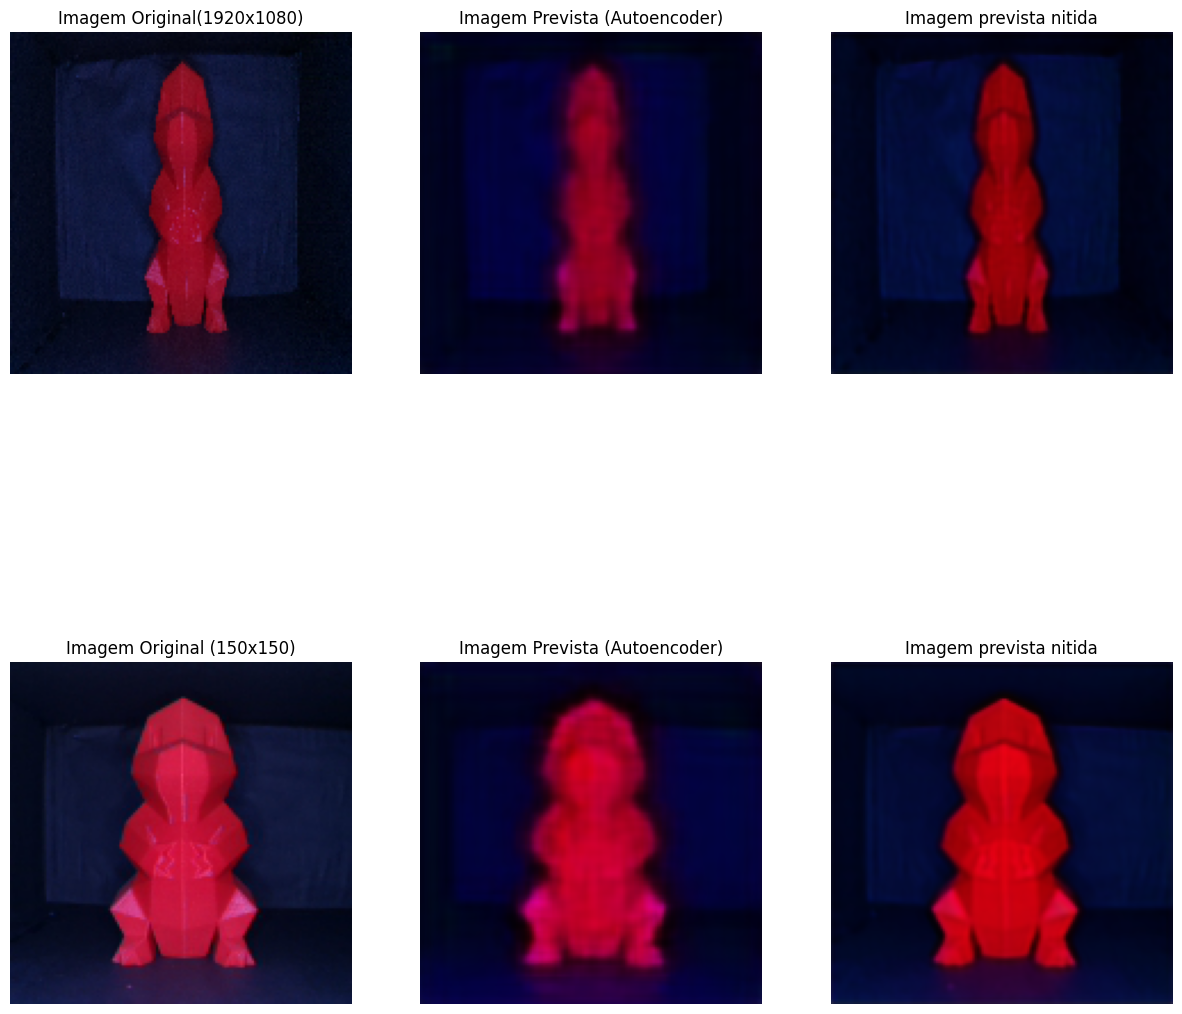

In [ ]:
# Plot da imagem original
plt.figure(figsize=(15, 15))
ax1 = plt.subplot(2, 3, 1)
ax1.imshow(img13)
ax1.set_title('Imagem Original(1920x1080)')
ax1.axis('off')

# Plot da imagem prevista
ax2 = plt.subplot(2, 3, 2)
ax2.imshow(imagens_decodificadas13[0].reshape(150, 150, 3))
ax2.set_title('Imagem Prevista (Autoencoder)')
ax2.axis('off')
# Plot da imagem prevista
ax3 = plt.subplot(2, 3, 3)
ax3.imshow(imagens_nitida13[0].reshape(150, 150, 3))
ax3.set_title('Imagem prevista nitida')
ax3.axis('off')

# Plot da imagem original

ax4 = plt.subplot(2, 3, 4)
ax4.imshow(img14)
ax4.set_title('Imagem Original (150x150)')
ax4.axis('off')

# Plot da imagem prevista
ax5 = plt.subplot(2, 3, 5)
ax5.imshow(imagens_decodificadas14[0].reshape(150, 150, 3))
ax5.set_title('Imagem Prevista (Autoencoder)')
ax5.axis('off')
# Plot da imagem prevista
ax6 = plt.subplot(2, 3, 6)
ax6.imshow(imagens_nitida14[0].reshape(150, 150, 3))
ax6.set_title('Imagem prevista nitida')
ax6.axis('off')
plt.show()
